In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('imdb_top_1000.csv')

print("Dataset Shape:", df.shape)
print(df.head())

print("\nMissing values per column: \n", df.isnull().sum())

numeric_features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
for col in numeric_features:
    if col not in df.columns:
          print(f" Missing column: {col}")

Dataset Shape: (1000, 16)
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   


In [7]:
df = df.dropna (subset=numeric_features + ['Genre'])

label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df ['Genre'])

X = df [numeric_features]
y = df['Genre_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


 KNN Model Accuracy: 0.04

Classification Report:
                               precision    recall  f1-score   support

           Action, Adventure       0.00      0.00      0.00         1
   Action, Adventure, Comedy       0.00      0.00      0.00         1
    Action, Adventure, Drama       0.10      0.33      0.15         3
   Action, Adventure, Family       0.00      0.00      0.00         1
  Action, Adventure, Fantasy       0.00      0.00      0.00         0
  Action, Adventure, History       0.00      0.00      0.00         1
   Action, Adventure, Horror       0.00      0.00      0.00         1
  Action, Adventure, Mystery       0.00      0.00      0.00         0
  Action, Adventure, Romance       0.00      0.00      0.00         0
   Action, Adventure, Sci-Fi       0.25      0.29      0.27         7
 Action, Adventure, Thriller       0.00      0.00      0.00         1
      Action, Adventure, War       0.00      0.00      0.00         0
  Action, Adventure, Western       0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

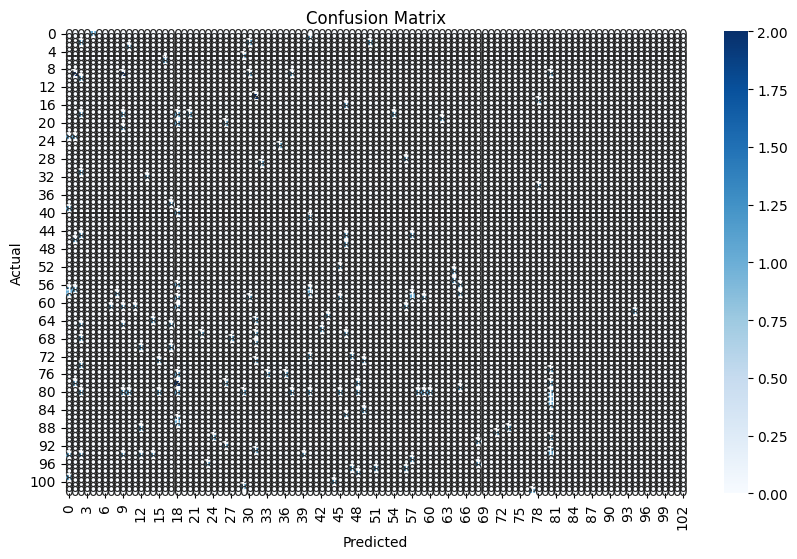

In [14]:
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5) # you can tune n_neighbors
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n KNN Model Accuracy: {acc:.2f}")

all_labels_present = np.unique(np.concatenate((y_test, y_pred)))
report_target_names = label_encoder.inverse_transform(all_labels_present)
print("\nClassification Report:\n", classification_report(y_test, y_pred,
                                                          labels=all_labels_present,
                                                          target_names=report_target_names))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()